# Using regression on the swedish house market

In [1]:
import pandas as  pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:

df = pd.read_csv('hemnet_data_clean.csv')
df.head()

,Unnamed: 0,address,asked_price,coordinate,final_price,pourcentage_difference,land_area,area,commune,price_per_area,rooms,sale_date,supplemental_area
0,0.0,Markviksvägen 15,6475000.0,"[59.371685, 17.8250389]",6950000,7.0,635.0,117.0,"Hässelby Södra Villastad, Stockholms kommun",59402.0,5.0,Såld 2022-06-17,44.0
1,1.0,Mälarhöjdsvägen 38,9950000.0,"[59.3008766, 17.9478054]",11300000,14.0,882.0,195.0,"Mälarhöjden - Hägersten, Stockholms kommun",57949.0,5.0,Såld 2022-06-17,22.0
2,2.0,Häradsvägen 202,5795000.0,"[59.27202322587505, 17.954076342308372]",6200000,7.0,1224.0,90.0,"Segeltorp, Huddinge kommun",68889.0,6.0,Såld 2022-06-17,90.0
3,3.0,Hemmansvägen 18,11950000.0,"[59.28390406370304, 18.07625832074728]",12700000,6.0,542.0,110.0,"Gamla Enskede, Stockholms kommun",115455.0,5.0,Såld 2022-06-17,48.0
4,4.0,Alholmsbacken 8,7950000.0,"[59.28134, 17.9009438]",8100000,2.0,690.0,157.0,"Skärholmshöjden., Stockholms kommun",51592.0,6.0,Såld 2022-06-17,0.0


In [3]:
df.describe()

,Unnamed: 0,asked_price,final_price,pourcentage_difference,land_area,area,price_per_area,rooms,supplemental_area
count,500.000000,5.000000e+02,5.000000e+02,500.000000,495.000000,499.000000,499.000000,490.000000,500.000000
mean,24.950000,9.375150e+06,1.004715e+07,8.914000,1012.278788,142.759519,79120.142285,6.165306,55.460000
std,14.448183,3.911988e+06,4.014927e+06,8.797579,1508.117107,116.952734,29949.142598,2.292341,54.933193
min,0.000000,1.475000e+06,1.490000e+06,0.000000,93.000000,21.000000,20617.000000,2.000000,0.000000
25%,12.475000,6.995000e+06,7.450000e+06,1.000000,557.500000,102.500000,55239.000000,5.000000,22.000000
50%,24.950000,8.475000e+06,8.852500e+06,7.000000,729.000000,134.000000,71635.000000,6.000000,54.000000
75%,37.425000,1.012375e+07,1.130000e+07,14.000000,977.000000,162.000000,99537.000000,7.000000,79.000000
max,49.900000,2.990000e+07,3.110000e+07,48.000000,13811.000000,1795.000000,187500.000000,45.000000,845.000000


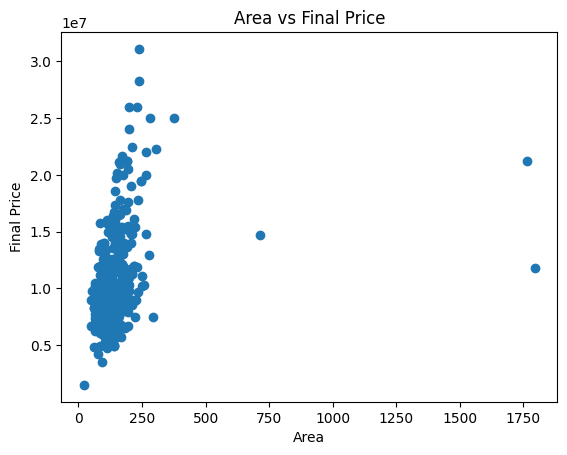

In [7]:
plt.title("Area vs Final Price")
plt.xlabel("Area")
plt.ylabel("Final Price")
plt.scatter(df['area'], df['final_price'])

In [8]:
new_df = df[['area','final_price']]

In [9]:
new_df.shape

(500, 2)

In [10]:
new_df.describe()

,area,final_price
count,499.000000,5.000000e+02
mean,142.759519,1.004715e+07
std,116.952734,4.014927e+06
min,21.000000,1.490000e+06
25%,102.500000,7.450000e+06
50%,134.000000,8.852500e+06
75%,162.000000,1.130000e+07
max,1795.000000,3.110000e+07


In [11]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   area         499 non-null    float64
 1   final_price  500 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 7.9 KB


In [12]:
new_df.dropna(inplace=True)

C:\Users\mrahi\AppData\Local\Temp\ipykernel_17368\1925939579.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.dropna(inplace=True)


<Axes: >

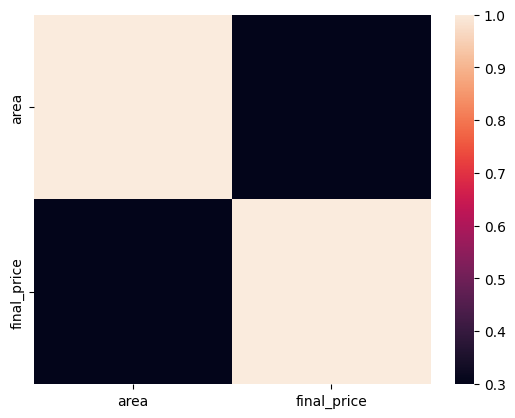

In [13]:
sns.heatmap(new_df.corr())

In [256]:
new_df.corr()

,area,final_price
area,1.000000,0.299277
final_price,0.299277,1.000000


In [14]:
X = new_df[['area']]
y = new_df[['final_price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 , random_state=42)

In [258]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(349, 1)
(349, 1)
(150, 1)
(150, 1)


In [259]:
# X_train = X_train.array.reshape(-1,1)

In [260]:
# X_test = X_test.array.reshape(-1,1)

In [18]:
lr = LinearRegression()
lr = lr.fit(X_train, y_train)

In [262]:
print(lr.intercept_)
print(lr.coef_)
print(lr.score(X_test, y_test))

[5936748.10862269]
[[28796.98821492]]
-0.8803744589865603


In [19]:
y_pred = lr.predict(X_test)

In [264]:
y_pred.shape

(150, 1)

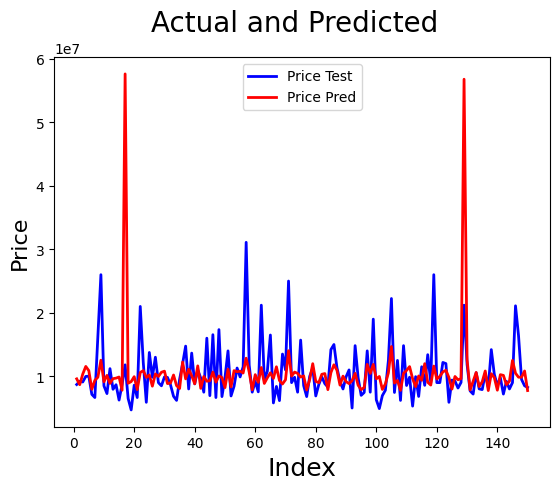

In [20]:
# Vi plottar för varje datapunkt i vår testdata vår prediktering och det faktiska värdet i vår test-data!!!
c = [i for i in range(1,151,1)]         # generating index 
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2, linestyle="-", label='Price Test')
plt.plot(c,y_pred, color="red",  linewidth=2, linestyle="-", label='Price Pred')
# plt.scatter(c,y_test, color="blue", label='Price Test')
# plt.scatter(c,y_pred, color="red", label='Price Pred')
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Price', fontsize=16)   
plt.legend()

Text(0, 0.5, 'ytest-ypred')

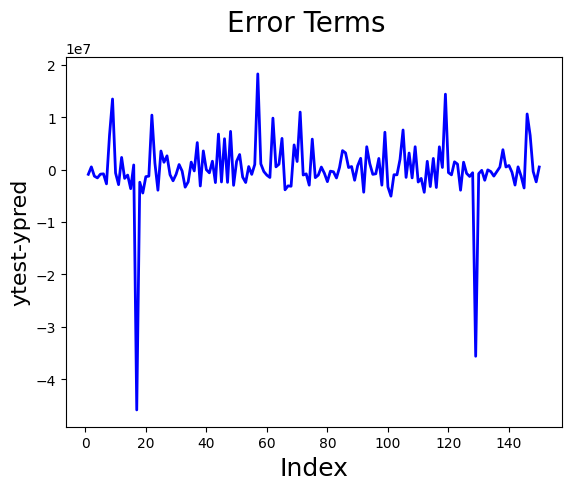

In [266]:
# Vi plottar det totala felet från vår prediktering gentemot vårt faktiska värde. Ju större spikar ju större fel har vår modell!
c = [i for i in range(1,151,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)       

In [21]:
mse = mean_squared_error(y_test, y_pred)

In [22]:
r_squared = r2_score(y_test, y_pred)

In [23]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 37089811970662.57
r_square_value : -0.8803744589865603


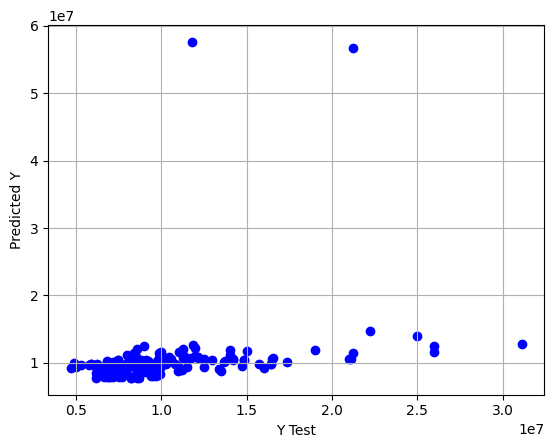

In [24]:
plt.scatter(y_test,y_pred,c='blue')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.grid()

In [25]:
reg_line = lr.predict(np.arange(0, 1800,1).reshape(-1,1))

c:\Users\mrahi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [26]:
print(reg_line[1751])

[56360274.47294143]


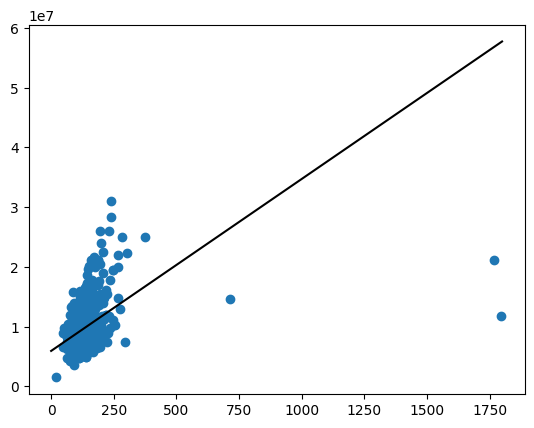

In [27]:
plt.scatter(df['area'], df['final_price'])
# plt.scatter(np.arange(0, 1800,1), reg_line, )
plt.plot([0,1800], [reg_line[0],reg_line[-1]], color='k')

### Take away outliers!

In [28]:
new_df_2 = new_df[new_df['area'] < 500]

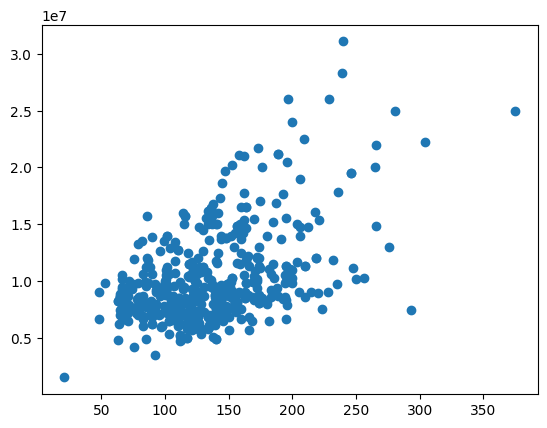

In [29]:
plt.scatter(new_df_2['area'], new_df_2['final_price'])

<Axes: >

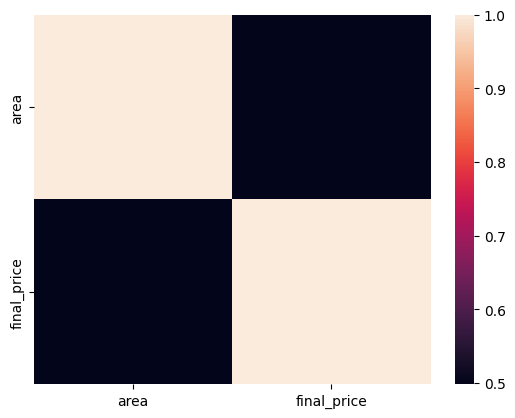

In [30]:
sns.heatmap(new_df_2.corr())

In [31]:
new_df_2.corr()

,area,final_price
area,1.000000,0.498343
final_price,0.498343,1.000000


In [278]:
new_df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 496 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   area         496 non-null    float64
 1   final_price  496 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 11.6 KB


In [32]:
X = new_df_2[['area']]
y = new_df_2[['final_price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 , random_state=42)

In [33]:
lr2 = LinearRegression()
lr2.fit(X_train, y_train)

LinearRegression()

In [281]:
X_test.shape

(149, 1)

In [35]:
print(lr2.intercept_)
print(lr2.coef_)
print(lr2.score(X_test, y_test))

[4906580.4654036]
[[37222.82401341]]
0.2647428224186681


In [36]:
y_pred = lr2.predict(X_test)

Text(0, 0.5, 'ytest-ypred')

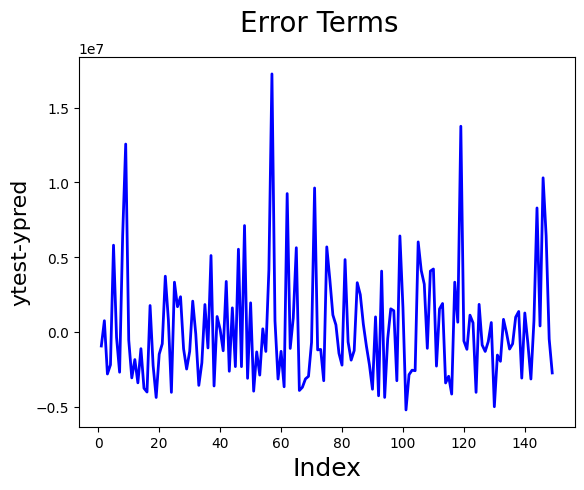

In [37]:
c = [i for i in range(1,150,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)       

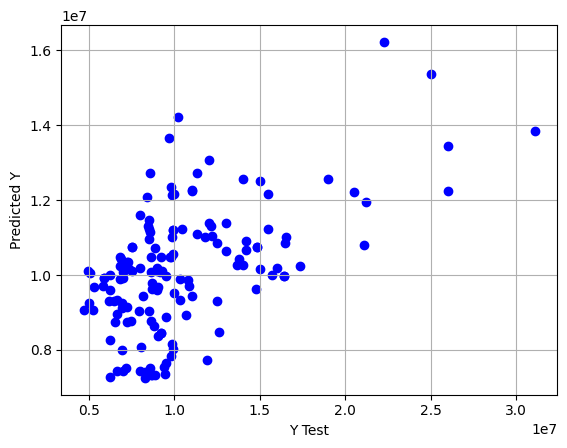

In [38]:
plt.scatter(y_test,y_pred,c='blue')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.grid()

In [286]:
reg_line = lr2.predict(np.arange(0, 1800,1).reshape(-1,1))

c:\Users\Sebastian\Systementor\TH_PYAI23\Maskininlärning_och_Deep_Learning\Lektioner\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [287]:
print(reg_line[1751])

[70083745.31288183]


In [288]:
print(reg_line[:10])

[[4906580.4654036 ]
 [4943803.28941701]
 [4981026.11343042]
 [5018248.93744383]
 [5055471.76145723]
 [5092694.58547064]
 [5129917.40948405]
 [5167140.23349746]
 [5204363.05751087]
 [5241585.88152428]]


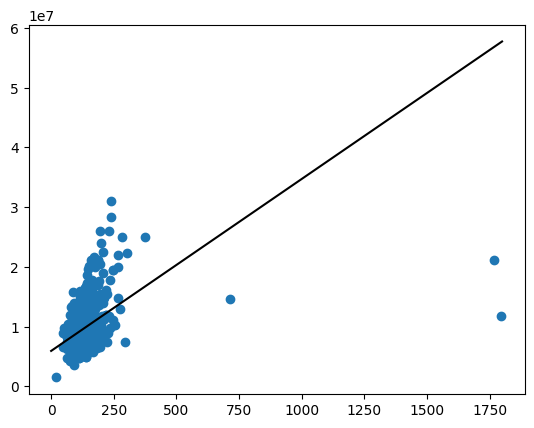

In [39]:
plt.scatter(df['area'], df['final_price'])
# plt.scatter(np.arange(0, 1800,1), reg_line, )
plt.plot([0,1800], [reg_line[0],reg_line[-1]], color='k')

In [290]:
first_line = lr.predict(np.arange(0, 1800,1).reshape(-1,1))
second_line = lr2.predict(np.arange(0, 1800,1).reshape(-1,1))


c:\Users\Sebastian\Systementor\TH_PYAI23\Maskininlärning_och_Deep_Learning\Lektioner\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Sebastian\Systementor\TH_PYAI23\Maskininlärning_och_Deep_Learning\Lektioner\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [291]:
second_line[-1][0]

71870440.86552544

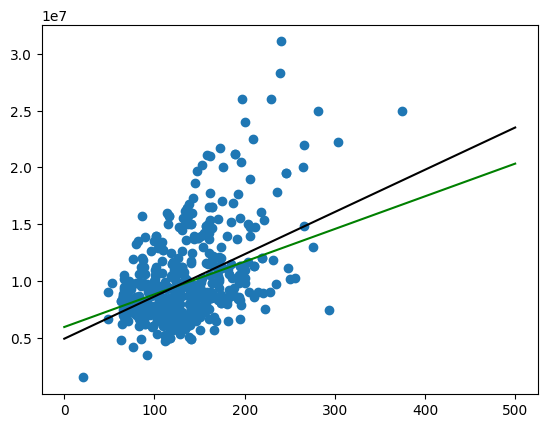

In [292]:
plt.scatter(new_df_2['area'], new_df_2['final_price'])
plt.plot([0, 500],[first_line[0],first_line[500]], color='g')
plt.plot([0, 500],[second_line[0],second_line[500]], color='k')